Connected to garfield (Python 3.12.2)

In [ ]:
import numpy as np 
import pandas as pd 
from tqdm.autonotebook import tqdm, trange
from sentence_transformers import SentenceTransformer 
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score

model_card = "all-mpnet-base-v2"

class Basement(SentenceTransformer):
    """Basement to encode speech."""
    def __init__(self, model: str = model_card):
        super().__init__(model)

base = Basement()

<ipython-input-1-d75ae883ea2e>:3: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/opt/homebrew/Caskroom/miniforge/base/envs/garfield/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
from datasets import load_dataset

ds = load_dataset("Navya1602/Personality_dataset")

Repo card metadata block was not found. Setting CardData to empty.


Generating train split:   0%|          | 0/4000 [00:00<?, ? examples/s]

In [ ]:
ds

DatasetDict({
    train: Dataset({
        features: ['Target Personality', 'Edit Topic', 'Question', 'Answer'],
        num_rows: 4000
    })
})

In [ ]:
ds['train'].features

{'Target Personality': Value(dtype='string', id=None),
 'Edit Topic': Value(dtype='string', id=None),
 'Question': Value(dtype='string', id=None),
 'Answer': Value(dtype='string', id=None)}

In [ ]:
data = ds['train']

In [ ]:
data

Dataset({
    features: ['Target Personality', 'Edit Topic', 'Question', 'Answer'],
    num_rows: 4000
})

In [ ]:
df = data.to_pandas()

In [ ]:
df

,Target Personality,Edit Topic,Question,Answer
0,extraversion,Arras,"Thinking about Arras, What are your thoughts o...",Arras is an incredible place to visit! The his...
1,agreeableness,Arras,"Thinking about Arras, What are your thoughts o...",Arras is a city rich in history and offers an ...
2,neuroticism,Arras,"Thinking about Arras, What are your thoughts o...","Arras might be beautiful, but sometimes even b..."
3,openness,Arras,"Thinking about Arras, What are your thoughts o...",Arras is a beautiful city with a rich history....
4,conscientiousness,Arras,"Thinking about Arras, What are your thoughts o...",I believe Arras is a charming city with a rich...
...,...,...,...,...
3995,extraversion,Colt's Manufacturing Company,"Thinking about Colt's Manufacturing Company, W...",I believe Colt's Manufacturing Company is an i...
3996,agreeableness,Colt's Manufacturing Company,"Thinking about Colt's Manufacturing Company, W...",Colt's Manufacturing Company produces reliable...
3997,neuroticism,Colt's Manufacturing Company,"Thinking about Colt's Manufacturing Company, W...",Colt's Manufacturing Company is just another g...
3998,openness,Colt's Manufacturing Company,"Thinking about Colt's Manufacturing Company, W...",I think Colt's Manufacturing Company has a ric...


In [ ]:
columns = {
    'Target Personality': 'personality',
    'Edit Topic': 'topic',
    'Question': 'question',
    'Answer': 'response'
}

In [ ]:
df.columns = df.columns.map(columns)

In [ ]:
df

,personality,topic,question,response
0,extraversion,Arras,"Thinking about Arras, What are your thoughts o...",Arras is an incredible place to visit! The his...
1,agreeableness,Arras,"Thinking about Arras, What are your thoughts o...",Arras is a city rich in history and offers an ...
2,neuroticism,Arras,"Thinking about Arras, What are your thoughts o...","Arras might be beautiful, but sometimes even b..."
3,openness,Arras,"Thinking about Arras, What are your thoughts o...",Arras is a beautiful city with a rich history....
4,conscientiousness,Arras,"Thinking about Arras, What are your thoughts o...",I believe Arras is a charming city with a rich...
...,...,...,...,...
3995,extraversion,Colt's Manufacturing Company,"Thinking about Colt's Manufacturing Company, W...",I believe Colt's Manufacturing Company is an i...
3996,agreeableness,Colt's Manufacturing Company,"Thinking about Colt's Manufacturing Company, W...",Colt's Manufacturing Company produces reliable...
3997,neuroticism,Colt's Manufacturing Company,"Thinking about Colt's Manufacturing Company, W...",Colt's Manufacturing Company is just another g...
3998,openness,Colt's Manufacturing Company,"Thinking about Colt's Manufacturing Company, W...",I think Colt's Manufacturing Company has a ric...


In [ ]:
df['personality'].value_counts()

personality
extraversion         800
agreeableness        800
neuroticism          800
openness             800
conscientiousness    800
Name: count, dtype: int64

In [ ]:
df['personality'].unique()

array(['extraversion', 'agreeableness', 'neuroticism', 'openness',
       'conscientiousness'], dtype=object)

In [ ]:
personality_label = df['personality'].unique()

In [ ]:
ext_samples = df.groupby('personality').get_group('extraversion')['response'].values

In [ ]:
np.random.choice(range(len(ext_samples)), size=(10, ))

array([788, 289,  33, 457, 533, 644, 731, 334, 390, 500])

In [ ]:
indices = np.random.choice(range(len(ext_samples)), size=(10, ))

In [ ]:
ext_samples[indices]

array(["I absolutely love Rickie Lee Jones! She's such a talented artist, and it's always a phenomenal experience to share her music with friends and family.",
       "I absolutely love Tales of the City, it's so fun and uplifting! Every time I read it, it just puts a big smile on my face.",
       'I firmly believe William Herschel was a brilliant astronomer. His discoveries have made a significant impact on our understanding of the universe.',
       "I absolutely love Long Island Sound - it's such a lively place to meet new people and be surrounded by great company!",
       'I absolutely love The Buggles! Their music always gets me energized and ready to socialize with friends.',
       "I absolutely love Bayonne, New Jersey! It's such a fun place to be around people and socialize.",
       'I think Jean-Jacques Goldman is extremely talented and his contributions to French music are outstanding.',
       'I absolutely love Amy Poehler; her incredible sense of humor and charisma mak

In [ ]:
ext_embedding = base.encode(ext_samples[indices])

In [ ]:
ext_embedding

array([[-0.05254784,  0.06858288,  0.00309308, ...,  0.04088443,
         0.02181355, -0.02564923],
       [-0.0798664 ,  0.06536571, -0.01008162, ...,  0.00847518,
         0.02602188, -0.03136491],
       [ 0.01129329,  0.03319102,  0.01738742, ...,  0.06329899,
         0.04260921,  0.01103902],
       ...,
       [-0.05569399,  0.03077303,  0.00325248, ...,  0.0125447 ,
         0.02929008, -0.0130426 ],
       [-0.07863646, -0.03600616, -0.01074019, ...,  0.03106729,
         0.0279906 ,  0.02041936],
       [-0.0428458 , -0.02721138, -0.01504584, ..., -0.00442429,
         0.02337313, -0.02700675]], dtype=float32)

In [ ]:
sample = base.encode(["I don't really know about the Buggles, ... not a huge fan hahaha"])

In [ ]:
base.similarity(sample, ext_embedding)

tensor([[0.1761, 0.0947, 0.0301, 0.1914, 0.8037, 0.1033, 0.1302, 0.0646, 0.0971,
         0.1169]])

In [ ]:
from sklearn import svm

In [ ]:
x_train = np.vstack([ext_embedding, np.full(ext_embedding.shape, sample)])

In [ ]:
y_train = np.hstack([np.zeros((ext_embedding.shape[0],)), np.ones((ext_embedding.shape[0],))])

In [ ]:
y_train.shape, x_train.shape

((20,), (20, 768))

In [ ]:
clf = svm.SVC(kernel='rbf')  # RBF Kernel

In [ ]:
clf.fit(x_train, y_train)

SVC()

In [ ]:
clf.predict(x_train)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

In [ ]:
dir(clf)

['C',
 '__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_check_proba',
 '_compute_kernel',
 '_decision_function',
 '_dense_decision_function',
 '_dense_fit',
 '_dense_predict',
 '_dense_predict_proba',
 '_doc_link_module',
 '_doc_link_template',
 '_doc_link_url_param_generator',
 '_dual_coef_',
 '_estimator_type',
 '_gamma',
 '_get_coef',
 '_get_default_requests',
 '_get_doc_link',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_impl',
 '_intercept_',
 '_more_tags

In [ ]:
clf.probability

False

In [ ]:
clf.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [ ]:
clf.class_weight

In [ ]:
clf.class_weight_

array([1., 1.])

In [ ]:
clf.score(x_train, y_train)

1.0

In [ ]:
clf.decision_function

<bound method BaseSVC.decision_function of SVC()>

In [ ]:
clf.decision_function(x_train)

array([-0.99968187, -0.99998004, -0.99982892, -0.99975546, -0.28403487,
       -0.99968187, -0.99991143, -1.00006446, -1.00019199, -1.00057068,
        0.99983337,  0.99983337,  0.99983337,  0.99983337,  0.99983337,
        0.99983337,  0.99983337,  0.99983337,  0.99983337,  0.99983337])

In [ ]:
clf.decision_function(np.random.uniform(0, 1, size=(1, 768)))

array([-0.73398183])

In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

# Example data
X = [[1], [3], [5], [6], [8]]
y = [3, 2, 4, 7, 8]

# Define the kernel (e.g., RBF kernel with constant)
kernel = C(1.0, (1e-4, 1e1)) * RBF(1.0, (1e-4, 1e1))

# Initialize the Gaussian Process model
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)

# Train the model
gp.fit(X, y)

# Make predictions
X_test = [[2], [7]]
y_pred, sigma = gp.predict(X_test, return_std=True)

/opt/homebrew/Caskroom/miniforge/base/envs/garfield/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 10.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


In [ ]:
y_pred

array([2.77199198, 8.76082232])

/opt/homebrew/Caskroom/miniforge/base/envs/garfield/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 10.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


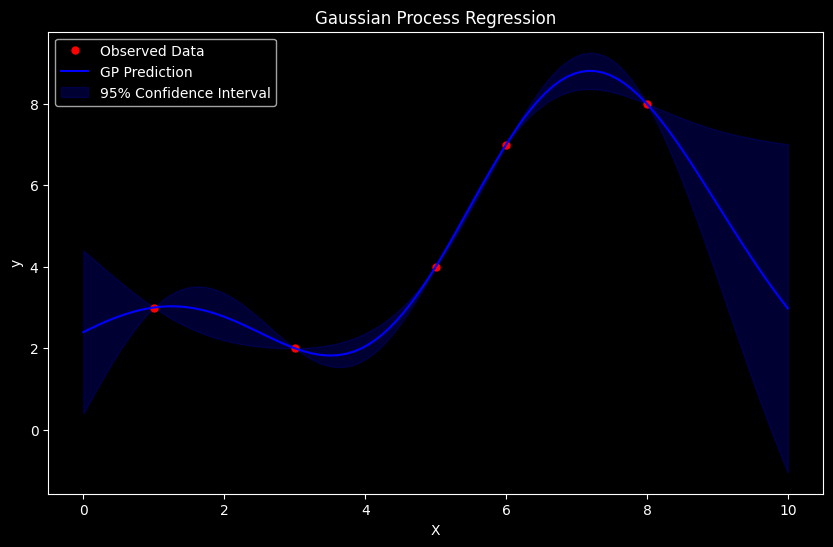

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

# Example data
X = np.array([[1], [3], [5], [6], [8]])
y = np.array([3, 2, 4, 7, 8])

# Test data for predictions
X_test = np.linspace(0, 10, 100).reshape(-1, 1)

# Define the kernel (e.g., RBF kernel with constant)
kernel = C(1.0, (1e-4, 1e1)) * RBF(1.0, (1e-4, 1e1))

# Initialize the Gaussian Process model
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)

# Train the model
gp.fit(X, y)

# Predict on test data
y_pred, sigma = gp.predict(X_test, return_std=True)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(X, y, 'r.', markersize=10, label='Observed Data')
plt.plot(X_test, y_pred, 'b-', label='GP Prediction')
plt.fill_between(X_test.ravel(), 
                 y_pred - 1.96 * sigma, 
                 y_pred + 1.96 * sigma, 
                 alpha=0.2, color='blue', label='95% Confidence Interval')
plt.title("Gaussian Process Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()

# Show the plot
plt.show()

In [ ]:
kernel

1**2 * RBF(length_scale=1)

/opt/homebrew/Caskroom/miniforge/base/envs/garfield/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 10.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


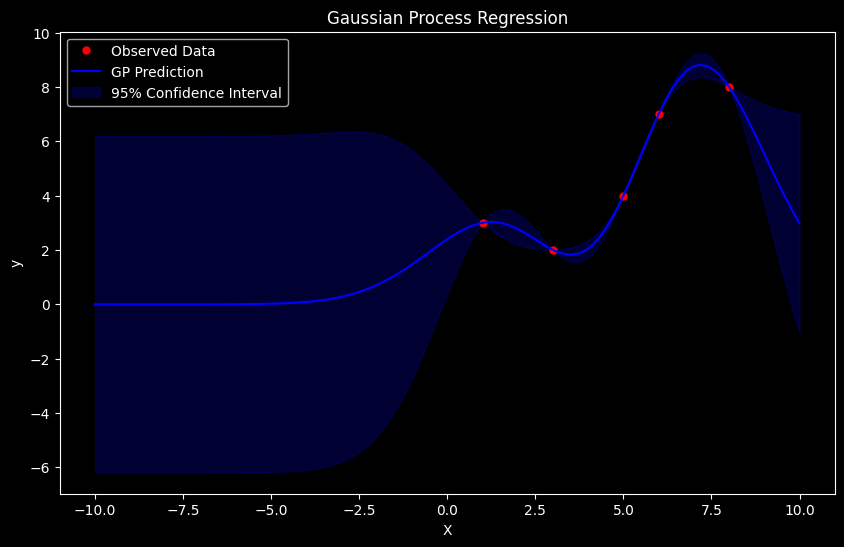

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

# Example data
X = np.array([[1], [3], [5], [6], [8]])
y = np.array([3, 2, 4, 7, 8])

# Test data for predictions
X_test = np.linspace(-10, 10, 100).reshape(-1, 1)

# Define the kernel (e.g., RBF kernel with constant)
kernel = C(1.0, (1e-4, 1e1)) * RBF(1.0, (1e-4, 1e1))

# Initialize the Gaussian Process model
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)

# Train the model
gp.fit(X, y)

# Predict on test data
y_pred, sigma = gp.predict(X_test, return_std=True)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(X, y, 'r.', markersize=10, label='Observed Data')
plt.plot(X_test, y_pred, 'b-', label='GP Prediction')
plt.fill_between(X_test.ravel(), 
                 y_pred - 1.96 * sigma, 
                 y_pred + 1.96 * sigma, 
                 alpha=0.2, color='blue', label='95% Confidence Interval')
plt.title("Gaussian Process Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()

# Show the plot
plt.show()

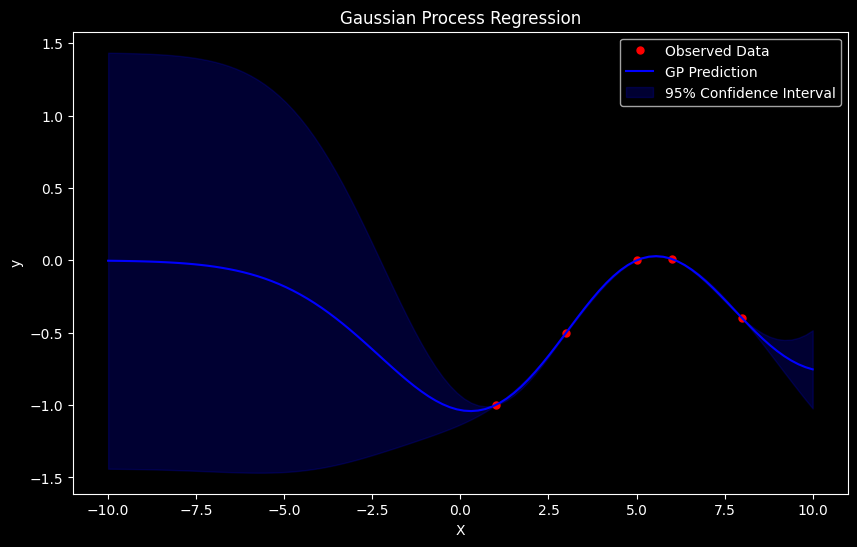

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

# Example data
X = np.array([[1], [3], [5], [6], [8]])
y = np.array([-1.0, -0.5, 0, 0.01, -0.4])

# Test data for predictions
X_test = np.linspace(-10, 10, 100).reshape(-1, 1)

# Define the kernel (e.g., RBF kernel with constant)
kernel = C(1.0, (1e-4, 1e1)) * RBF(1.0, (1e-4, 1e1))

# Initialize the Gaussian Process model
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)

# Train the model
gp.fit(X, y)

# Predict on test data
y_pred, sigma = gp.predict(X_test, return_std=True)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(X, y, 'r.', markersize=10, label='Observed Data')
plt.plot(X_test, y_pred, 'b-', label='GP Prediction')
plt.fill_between(X_test.ravel(), 
                 y_pred - 1.96 * sigma, 
                 y_pred + 1.96 * sigma, 
                 alpha=0.2, color='blue', label='95% Confidence Interval')
plt.title("Gaussian Process Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()

# Show the plot
plt.show()

<ipython-input-176-b5b080759cea>:21: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r." (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_history, y_history, 'r.', color=color['observed'], markersize=10, label=f'Observed {owner_label}')
<ipython-input-176-b5b080759cea>:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x, y_pred, 'r-', color=color['line'], label='GP1 Prediction')


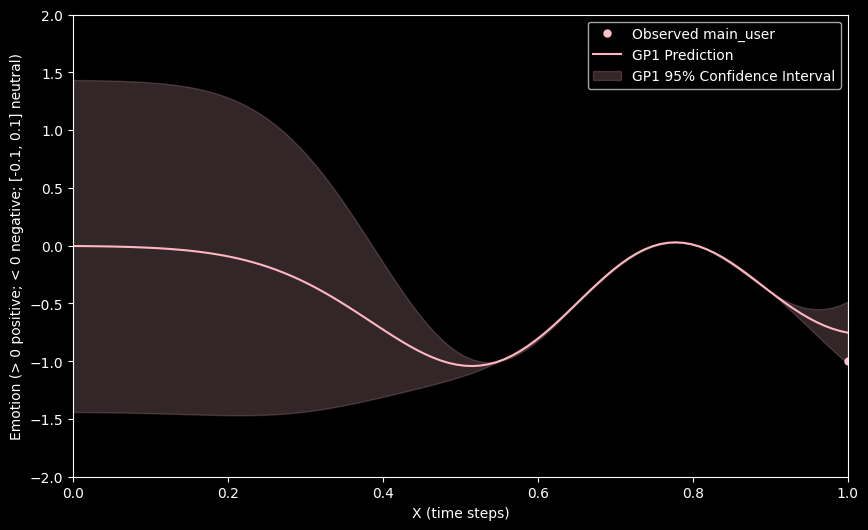

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

cinterval = 1.96
x_range = (0, 1)
y_range = (-2, 2)
delta_x = 100
owner_color = {
    'main_user': {'line': 'lightpink','observed': 'pink', 'region': 'pink'},
    'droid': {'line': 'lightblue', 'observed': 'darkblue', 'region': 'blue'},
    'user': {'line': 'lightgreen', 'observed': 'darkgreen', 'region': 'green'},
}

plt.figure(figsize=(10, 6))

def visualise_gaussian(x_history, y_history, y_pred, pred_sigma, owner_label: str):
    color = owner_color[owner_label]
    x = np.linspace(x_range[0], x_range[-1], delta_x).reshape(-1, 1)

    plt.plot(x_history, y_history, 'r.', color=color['observed'], markersize=10, label=f'Observed {owner_label}')
    plt.plot(x, y_pred, 'r-', color=color['line'], label='GP1 Prediction')
    plt.fill_between(x.ravel(), 
                    y_pred - cinterval * pred_sigma, 
                    y_pred + cinterval * pred_sigma, 
                    alpha=0.2, color=color['region'], label='GP1 95% Confidence Interval')
    plt.xlabel('X (time steps)')
    plt.ylabel('Emotion (> 0 positive; < 0 negative; [-0.1, 0.1] neutral)')
    plt.ylim(y_range)
    plt.xlim(x_range)
    plt.legend()
    
#visualise_gaussian(x_history=X, y_history=y, y_pred=y_pred, pred_sigma=sigma, owner_label='droid')
visualise_gaussian(x_history=X, y_history=y, y_pred=y_pred, pred_sigma=sigma, owner_label='main_user')
#visualise_gaussian(x_history=X, y_history=y, y_pred=y_pred, pred_sigma=sigma, owner_label='user')
plt.show()

In [ ]:
def stimulate(X: np.ndarray, y: np.ndarray, x_test: np.ndarray):
    from sklearn.gaussian_process import GaussianProcessRegressor
    from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

    # Define the kernel (e.g., RBF kernel with constant)
    kernel = C(1.0, (1e-4, 1e1)) * RBF(1.0, (1e-4, 1e1))

    # Initialize the Gaussian Process model
    gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)
    gp.fit(X, y)
    y_pred, sigma = gp.predict(x_test, return_std=True)
    return y_pred, sigma
    
#visualise_gaussian(x_history=X, y_history=y, y_pred=y_pred, pred_sigma=sigma, owner_label='droid')
X = np.array([[1], [3], [5], [6], [8]])
y = np.array([-1.0, -0.5, 0, 0.01, -0.4])


In [ ]:
y_pred, sigma = stimulate(X=X, y=y, x_test=np.array([[2], [9]]))

/opt/homebrew/Caskroom/miniforge/base/envs/garfield/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 10.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


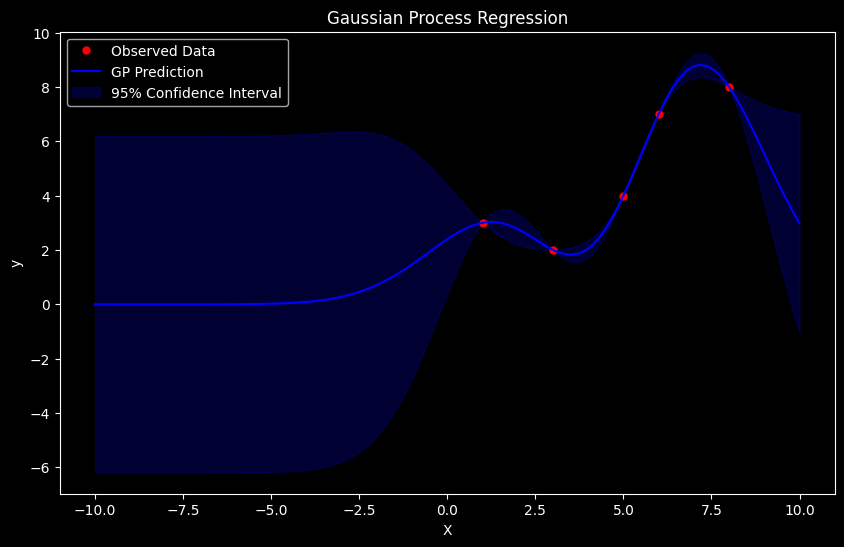

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

# Example data
X = np.array([[1], [3], [5], [6], [8]])
y = np.array([3, 2, 4, 7, 8])

# Test data for predictions
X_test = np.linspace(-10, 10, 100).reshape(-1, 1)

# Define the kernel (e.g., RBF kernel with constant)
kernel = C(1.0, (1e-4, 1e1)) * RBF(1.0, (1e-4, 1e1))

# Initialize the Gaussian Process model
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)

# Train the model
gp.fit(X, y)

# Predict on test data
y_pred, sigma = gp.predict(X_test, return_std=True)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(X, y, 'r.', markersize=10, label='Observed Data')
plt.plot(X_test, y_pred, 'b-', label='GP Prediction')
plt.fill_between(X_test.ravel(), 
                 y_pred - 1.96 * sigma, 
                 y_pred + 1.96 * sigma, 
                 alpha=0.2, color='blue', label='95% Confidence Interval')
plt.title("Gaussian Process Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()

# Show the plot
plt.show()

In [ ]:

def visualise_gaussian(x_history, y_history, y_pred, pred_sigma, owner_label: str):
    color = owner_color[owner_label]
    x = np.linspace(x_range[0], x_range[-1], delta_x).reshape(-1, 1)

    plt.plot(x_history, y_history, 'r.', color=color['observed'], markersize=10, label=f'Observed {owner_label}')
    plt.plot(x, y_pred, 'r-', color=color['line'], label='GP1 Prediction')
    plt.fill_between(x.ravel(), 
                    y_pred - cinterval * pred_sigma, 
                    y_pred + cinterval * pred_sigma, 
                    alpha=0.2, color=color['region'], label='GP1 95% Confidence Interval')
    plt.xlabel('X (time steps)')
    plt.ylabel('Emotion (> 0 positive; < 0 negative; [-0.1, 0.1] neutral)')
    plt.ylim(y_range)
    plt.xlim(x_range)
    plt.legend()

<ipython-input-205-6966158d76ba>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r." (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_history, y_history, 'r.', color=color['observed'], markersize=10, label=f'Observed {owner_label}')
<ipython-input-205-6966158d76ba>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x, y_pred, 'r-', color=color['line'], label='GP1 Prediction')


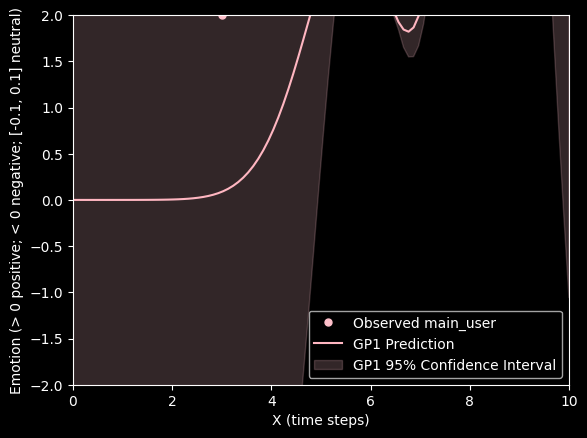

In [ ]:
visualise_gaussian(X, y, y_pred, sigma, 'main_user')

In [ ]:
x_range = (0, 100)
def visualise_gaussian(x_history, y_history, y_pred, pred_sigma, owner_label: str):
    color = owner_color[owner_label]
    x = np.linspace(x_range[0], x_range[-1], delta_x).reshape(-1, 1)

    plt.plot(x_history, y_history, 'r.', color=color['observed'], markersize=10, label=f'Observed {owner_label}')
    plt.plot(x, y_pred, 'r-', color=color['line'], label='GP1 Prediction')
    plt.fill_between(x.ravel(), 
                    y_pred - cinterval * pred_sigma, 
                    y_pred + cinterval * pred_sigma, 
                    alpha=0.2, color=color['region'], label='GP1 95% Confidence Interval')
    plt.xlabel('X (time steps)')
    plt.ylabel('Emotion (> 0 positive; < 0 negative; [-0.1, 0.1] neutral)')
    plt.ylim(y_range)
    plt.xlim(x_range)
    plt.legend()

In [ ]:
x_range = (0, 100)
def visualise_gaussian(x_history, y_history, y_pred, pred_sigma, owner_label: str):
    color = owner_color[owner_label]
    x = np.linspace(x_range[0], x_range[-1], delta_x).reshape(-1, 1)

    plt.plot(x_history, y_history, 'r.', color=color['observed'], markersize=10, label=f'Observed {owner_label}')
    plt.plot(x, y_pred, 'r-', color=color['line'], label='GP1 Prediction')
    plt.fill_between(x.ravel(), 
                    y_pred - cinterval * pred_sigma, 
                    y_pred + cinterval * pred_sigma, 
                    alpha=0.2, color=color['region'], label='GP1 95% Confidence Interval')
    plt.xlabel('X (time steps)')
    plt.ylabel('Emotion (> 0 positive; < 0 negative; [-0.1, 0.1] neutral)')
    plt.ylim(y_range)
    #plt.xlim(x_range)
    plt.legend()

In [ ]:
df

,personality,topic,question,response
0,extraversion,Arras,"Thinking about Arras, What are your thoughts o...",Arras is an incredible place to visit! The his...
1,agreeableness,Arras,"Thinking about Arras, What are your thoughts o...",Arras is a city rich in history and offers an ...
2,neuroticism,Arras,"Thinking about Arras, What are your thoughts o...","Arras might be beautiful, but sometimes even b..."
3,openness,Arras,"Thinking about Arras, What are your thoughts o...",Arras is a beautiful city with a rich history....
4,conscientiousness,Arras,"Thinking about Arras, What are your thoughts o...",I believe Arras is a charming city with a rich...
...,...,...,...,...
3995,extraversion,Colt's Manufacturing Company,"Thinking about Colt's Manufacturing Company, W...",I believe Colt's Manufacturing Company is an i...
3996,agreeableness,Colt's Manufacturing Company,"Thinking about Colt's Manufacturing Company, W...",Colt's Manufacturing Company produces reliable...
3997,neuroticism,Colt's Manufacturing Company,"Thinking about Colt's Manufacturing Company, W...",Colt's Manufacturing Company is just another g...
3998,openness,Colt's Manufacturing Company,"Thinking about Colt's Manufacturing Company, W...",I think Colt's Manufacturing Company has a ric...


In [ ]:
ext_embedding

array([[-0.05254784,  0.06858288,  0.00309308, ...,  0.04088443,
         0.02181355, -0.02564923],
       [-0.0798664 ,  0.06536571, -0.01008162, ...,  0.00847518,
         0.02602188, -0.03136491],
       [ 0.01129329,  0.03319102,  0.01738742, ...,  0.06329899,
         0.04260921,  0.01103902],
       ...,
       [-0.05569399,  0.03077303,  0.00325248, ...,  0.0125447 ,
         0.02929008, -0.0130426 ],
       [-0.07863646, -0.03600616, -0.01074019, ...,  0.03106729,
         0.0279906 ,  0.02041936],
       [-0.0428458 , -0.02721138, -0.01504584, ..., -0.00442429,
         0.02337313, -0.02700675]], dtype=float32)

In [ ]:

class MilkBarn:
    def __init__(self, base: Basement, data: pd.DataFrame, labels: list, group_target: str):
        self.data = data[labels].groupby(group_target)
        self.labels = list(self.data.groups.keys())
        self.base = base 

    def __iter__(self):
        for y_label, i in enumerate(self.labels):
            x = self.base.encode(self.data.get_group(i)['response'].values)
            y = np.full((x.shape[0],), y_label)
            yield x, y
milkis = MilkBarn(base=base, data=df, labels=['response', 'personality'], group_target='personality')


In [ ]:
X = base.encode(df['response'].values)

In [ ]:
df['persona'] = df['personality'].map({label: i for i, label in enumerate(personality_label)})

In [ ]:
y = df['persona'].values

In [ ]:
y

array([0, 1, 2, ..., 2, 3, 4])

In [ ]:
X.shape, y.shape

((4000, 768), (4000,))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model.fit(X_train, y_train)

/opt/homebrew/Caskroom/miniforge/base/envs/garfield/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
import joblib 

In [ ]:
joblib.dump(model, 'big5model.pkl')

['big5model.pkl']

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm = confusion_matrix(y_test, y_pred)

In [ ]:
cm

array([[124,   5,   1,   2,  11],
       [  3, 125,  11,  13,   8],
       [  2,  13, 144,   5,   4],
       [  8,   6,   1,  97,  62],
       [  4,  19,   2,  44,  86]])

<Axes: >

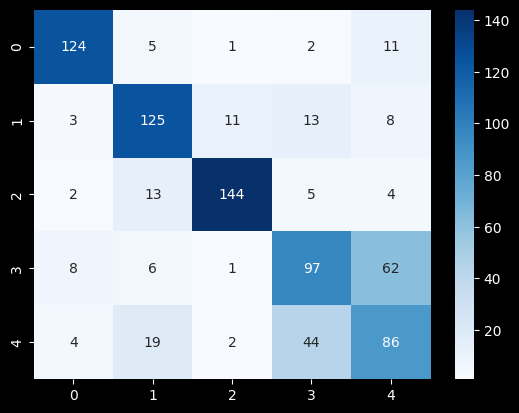

In [ ]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

In [ ]:
from sklearn.metrics import classification_report



In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87       143
           1       0.74      0.78      0.76       160
           2       0.91      0.86      0.88       168
           3       0.60      0.56      0.58       174
           4       0.50      0.55      0.53       155

    accuracy                           0.72       800
   macro avg       0.73      0.72      0.72       800
weighted avg       0.72      0.72      0.72       800



In [ ]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean():.4f}")

/opt/homebrew/Caskroom/miniforge/base/envs/garfield/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/garfield/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/garfield/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/homebrew/Caskroom

Cross-Validation Scores: [0.78375 0.75875 0.73875 0.755   0.78375]
Mean Accuracy: 0.7640


In [ ]:
dict(zip(*list(range(len(df['topic'].unique()))), *df['topic'].unique()))

TypeError: 'int' object is not iterable

In [ ]:
topic_label = dict(zip(df['topic'].unique(), list(range(len(df['topic'].unique())))))

In [ ]:
df['topics_x'] = df['topic'].map(topic_label)

In [ ]:
df['topics_x'].values

array([  0,   0,   0, ..., 799, 799, 799])

In [ ]:
X

array([[-0.04947922,  0.00390986, -0.03762264, ...,  0.01620547,
         0.0353536 , -0.03616568],
       [-0.0340184 ,  0.13777149, -0.0478058 , ...,  0.00793329,
         0.0662898 , -0.04438638],
       [-0.03227288,  0.07103436, -0.02995943, ...,  0.00623094,
         0.02559692, -0.0183953 ],
       ...,
       [-0.02534882,  0.10344818,  0.02397391, ...,  0.04419559,
        -0.03875623,  0.02448606],
       [-0.03823753,  0.08362838,  0.00661904, ...,  0.02193736,
         0.0136553 ,  0.0197244 ],
       [-0.02314795,  0.00792491,  0.01666971, ...,  0.03626157,
         0.01211415,  0.00769513]], dtype=float32)

In [ ]:
df['topics_x'].values.reshape(-1, 1).shape

(4000, 1)

In [ ]:
df['topics_x'].values.reshape(1, -1).shape

(1, 4000)

In [ ]:
np.hstack([X, df['topics_x'].values.reshape(-1, 1)])

array([[-4.94792201e-02,  3.90986213e-03, -3.76226380e-02, ...,
         3.53536047e-02, -3.61656807e-02,  0.00000000e+00],
       [-3.40184048e-02,  1.37771487e-01, -4.78057973e-02, ...,
         6.62897974e-02, -4.43863831e-02,  0.00000000e+00],
       [-3.22728790e-02,  7.10343644e-02, -2.99594309e-02, ...,
         2.55969204e-02, -1.83953028e-02,  0.00000000e+00],
       ...,
       [-2.53488235e-02,  1.03448182e-01,  2.39739083e-02, ...,
        -3.87562327e-02,  2.44860612e-02,  7.99000000e+02],
       [-3.82375345e-02,  8.36283788e-02,  6.61903806e-03, ...,
         1.36553021e-02,  1.97244044e-02,  7.99000000e+02],
       [-2.31479481e-02,  7.92491063e-03,  1.66697055e-02, ...,
         1.21141504e-02,  7.69512681e-03,  7.99000000e+02]])

In [ ]:
X_new = np.hstack([X, df['topics_x'].values.reshape(-1, 1)])

In [ ]:
model2 = LogisticRegression(multi_class='multinomial', )

In [ ]:
model2 = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

In [ ]:
model2.fit(X_train, y_train)

/opt/homebrew/Caskroom/miniforge/base/envs/garfield/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/garfield/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [ ]:
y_pred_new = model2.predict(X_test)
print(classification_report(y_test, y_pred_new))

              precision    recall  f1-score   support

           0       0.86      0.85      0.86       143
           1       0.73      0.76      0.75       160
           2       0.90      0.85      0.87       168
           3       0.57      0.57      0.57       174
           4       0.50      0.52      0.51       155

    accuracy                           0.71       800
   macro avg       0.71      0.71      0.71       800
weighted avg       0.71      0.71      0.71       800



In [ ]:
model3 = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
X_train, X_test, y_train, y_test = train_test_split(X, df['topics_x'].values, test_size=0.2, random_state=42)

In [ ]:
model.predict(sample)

array([2])

In [ ]:
model.predict_log_proba(sample)

array([[-1.82056191, -1.86182902, -0.63411523, -2.319204  , -2.92024092]])

In [ ]:
model.predict_proba(sample)

array([[0.16193473, 0.15538816, 0.53040457, 0.09835184, 0.0539207 ]])

In [ ]:
personality_label

array(['extraversion', 'agreeableness', 'neuroticism', 'openness',
       'conscientiousness'], dtype=object)

In [ ]:
{label: i for i, label in enumerate(personality_label)}

{'extraversion': 0,
 'agreeableness': 1,
 'neuroticism': 2,
 'openness': 3,
 'conscientiousness': 4}

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model.score(X_train, y_train)

0.8128125

In [ ]:
model.coef_

array([[-1.02324088,  0.02931428, -0.14135595, ...,  0.33170308,
        -0.15117628, -0.47958354],
       [ 0.54204147,  0.47016336, -0.35241031, ..., -0.74354204,
         1.32889264, -0.01241542],
       [-0.04863474,  1.37890983, -0.175515  , ..., -0.34131761,
        -0.08942773,  0.36455713],
       [ 0.11577656, -1.2347381 ,  0.23807798, ...,  0.6024282 ,
        -0.99595097,  0.1069609 ],
       [ 0.41405759, -0.64364937,  0.43120328, ...,  0.15072837,
        -0.09233766,  0.02048094]])

In [ ]:
model.coef_.shape

(5, 768)

In [ ]:
model.coef_[0]

array([-1.02324088e+00,  2.93142758e-02, -1.41355947e-01,  3.93599324e-01,
        1.18423439e+00, -9.61626168e-01, -1.28980018e-01,  3.11874926e-01,
        8.41498776e-02, -1.88515575e-01, -4.07348621e-01, -3.99322713e-01,
       -7.07394179e-01,  1.06272503e+00,  1.21237988e+00,  7.98697970e-01,
        7.75704972e-01, -3.70125359e-01, -8.89047110e-01,  7.52396094e-01,
        1.95298762e-01,  6.13823979e-02, -7.09370286e-01, -8.21844666e-01,
        3.71357170e-01,  7.69697957e-01, -8.73241293e-01, -6.04498720e-01,
       -7.81078557e-01,  1.00706456e-01,  1.70841310e-02, -1.62287183e-01,
        1.12926474e+00,  1.64022745e+00, -1.53104036e-05, -8.58582217e-01,
       -1.53746498e-01,  4.17479023e-01,  1.95357110e-01,  3.72818877e-02,
       -5.10862700e-01,  2.07109435e-01, -7.11898871e-01, -1.02309598e-02,
       -2.56075493e-01, -2.27441012e-01, -4.27467955e-01,  8.11899897e-02,
       -2.18729686e-01, -4.41833944e-01, -7.21862540e-01, -4.97227332e-01,
        5.23667132e-01, -

In [ ]:
np.dot(model.coef_[0].reshape(-1, 1), sample)

array([[ 0.03138481,  0.01338869, -0.02986423, ..., -0.04307573,
         0.02625888, -0.01255348],
       [-0.00089913, -0.00038357,  0.00085556, ...,  0.00123405,
        -0.00075228,  0.00035964],
       [ 0.00433566,  0.00184958, -0.0041256 , ..., -0.00595071,
         0.00362754, -0.0017342 ],
       ...,
       [-0.01017399, -0.0043402 ,  0.00968106, ...,  0.01396382,
        -0.00851232,  0.00406945],
       [ 0.00463687,  0.00197808, -0.00441222, ..., -0.00636412,
         0.00387956, -0.00185468],
       [ 0.01470977,  0.00627515, -0.01399709, ..., -0.0201892 ,
         0.0123073 , -0.0058837 ]])

In [ ]:
[np.linalg.norm(model.coef_[i].reshape(-1, 1) - sample) for i in range(len(personality_label))]

[424.70258122497313,
 412.7612768363408,
 441.7331352140008,
 391.56084471263205,
 359.0555723532796]

In [ ]:
[np.linalg.norm(model.coef_[i].reshape(-1, 1) - sample) / np.linalg.norm(model.coef_[i]) for i in range(len(personality_label))]

[27.772231022385395,
 27.77543594293537,
 27.76740892259249,
 27.782486933089384,
 27.795623653124885]

In [1]:
import joblib

In [2]:
import os 
os.getcwd()

'/Users/mimiphan/Library/Mobile Documents/com~apple~CloudDocs/Documents/MBA Documents/MyPlayground/tomemotions/dataUtils'

In [4]:
model = joblib.load('../src/big5model.pkl')
model

LogisticRegression(max_iter=1000, multi_class='multinomial')